In [2]:
import quantstats as qs
import yfinance as yf
import ccxt as ccxt
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import utils as utl
from datetime import datetime
import html_evaluation_portfolio as hep
import matplotlib.pyplot as plt
from IPython.display import display

## Correlation between Vix, stock, bond and bitcoin

In [8]:
list_securities = ['VIX', 'SSO', 'TIP'] #not sure about the name of the securities (expecially TIP)

data = hep.create_dataframe(list_securities) #I can import this dataframe but it is preatty fast.

In [9]:
timeframe = '1d'
limit = 50 #Default best for binance
startDate = "2014-12-04"
startDate = datetime.strptime(startDate, "%Y-%m-%d")
startDate = datetime.timestamp(startDate)
startDate = int(startDate) * 1000

exchanges = ccxt.binance()
d = exchanges.fetch_ohlcv('BTC/USDT', timeframe = timeframe, limit = len(data),  since = startDate)
df = pd.DataFrame(d, columns = ['time', 'open', 'high', 'low', 'close', 'volume'])
data['BTC'] = list(df['close'])

          VIX       SSO       TIP       BTC
VIX  1.000000 -0.115484 -0.190600 -0.020330
SSO -0.115484  1.000000  0.714422  0.111316
TIP -0.190600  0.714422  1.000000 -0.211879
BTC -0.020330  0.111316 -0.211879  1.000000


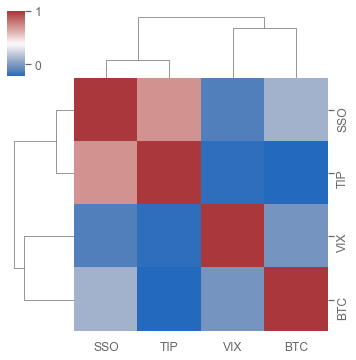

In [10]:
corr = data.corr()
print(corr)
sns.clustermap(corr, figsize=(5,5), cmap='vlag')